In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from scipy.io import loadmat
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

import matplotlib.pyplot as plt
import seaborn as sns
cmap = plt.cm.hsv_r

In [3]:
# Read lfp data
data = loadmat('../data/F141020-lfp-5min-1kHz.mat')

# Extract pre_pmcao
Z_pre = data['pre_pmcao']

# Remove bad channels
bad_channels = np.array([5, 8, 9, 12, 16, 26])
Z_pre = np.delete(Z_pre, bad_channels, axis=1)

In [4]:
Z_pre.shape

(300000, 26)

In [5]:
# Standardize Z_pre to 0 mean and unit standard dev
num_epochs = 300
rate = 1000
for i in range(num_epochs):
    ioffset = i * rate
    preprocessing.scale(Z_pre[ioffset:ioffset+rate,], copy=False)

In [28]:
np.mean(Z_pre[:999, ])

-9.557037015615872e-06

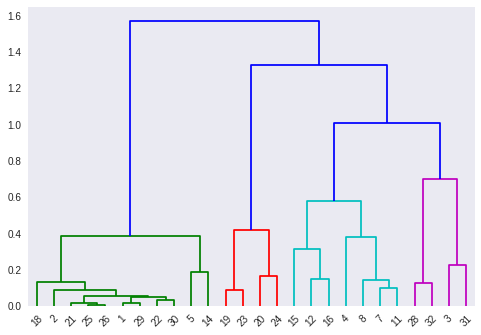

In [7]:
fig, ax = plt.subplots()
ax.grid(False)
i = 0  # epoch 1
ioffset = i * rate  # offset for sampling rate (1000 pts per epoch)
Z_clust = linkage(Z_pre[ioffset:ioffset+rate,].T, 'complete', 'correlation')  # Agglomerative clustering w/ complete linkage
labels = [i for i in range(1, 33) if i not in bad_channels+1]  # Create labels for channels 1-32 (excluding bad channels)
dend = dendrogram(Z_clust, color_threshold=1, labels=labels)  # Create dendogram

In [8]:
y = [1, 2, 3, 4] * 8
x = [1]*4 + [2]*4 + [3]*4 + [4]*4 + [5]*4 + [6]*4 + [7]*4 + [8]*4
#ch_labels = [j for i in range(1, 9) for j in range(i*4, 4*(i-1), -1)]
ch_labels = [i for i in range(1, 33)]

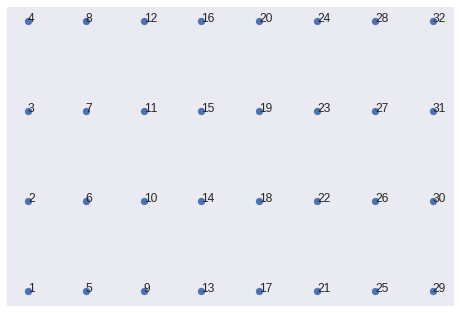

In [9]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])
ax.scatter(x, y)

for i, txt in enumerate(ch_labels):
    ax.annotate(txt, (x[i],y[i]))

In [10]:
k = 4
clusters = fcluster(Z_clust, k, criterion='maxclust')
clusters

array([1, 1, 4, 3, 1, 3, 3, 3, 3, 1, 3, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 4, 1,
       1, 4, 4], dtype=int32)

In [11]:
# TODO: Refactor!
clusters2 = np.zeros(32)
j = 0
for i in range(32):
    if i not in bad_channels:
        clusters2[i] = clusters[j]
        j += 1

In [12]:
clusters2

array([ 1.,  1.,  4.,  3.,  1.,  0.,  3.,  3.,  0.,  0.,  3.,  3.,  0.,
        1.,  3.,  3.,  0.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,  1.,  1.,
        0.,  4.,  1.,  1.,  4.,  4.])

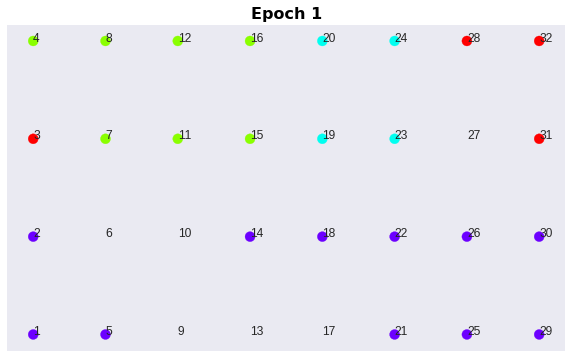

In [13]:
title_font = {'fontname':'DejaVu Sans', 'size':'16', 'color':'black', 'weight':'bold'}

fig, ax = plt.subplots(figsize=(10, 6))
ax.grid(False)
ax.set_xticks([])
ax.set_yticks([])

cmap = plt.cm.hsv_r
ss = [n*100 if n == 0  else 100 for n in clusters2]
ax.scatter(x, y, c=clusters2, s=ss, cmap=cmap)

for i, txt in enumerate(ch_labels):
    ax.annotate(txt, (x[i],y[i]))
ax.set_title('Epoch 1', **title_font)

In [14]:
my_clusters = []

num_epochs = 300
rate = 1000
for i in range(num_epochs):
    ioffset = i * rate
    Z_clust = linkage(Z_pre[ioffset:ioffset+rate,].T, 'complete', 'correlation')
    
    k = 4  # number of clusters
    clusters = fcluster(Z_clust, k, criterion='maxclust')
    
    clusters2 = np.zeros(32)
    j = 0
    for i in range(32):
        if i not in bad_channels:
            clusters2[i] = clusters[j]
            j += 1
    my_clusters += [clusters2]

In [15]:
# cmap = plt.cm.hsv_r
# ch_labels = [i for i in range(1, 33)]
# title_font = {'fontname':'DejaVu Sans', 'size':'16', 'color':'black', 'weight':'bold'}


# for i, cluster in enumerate(my_clusters):
#     fig, ax = plt.subplots(figsize=(10, 6))
#     ax.grid(False)
#     ax.set_xticks([])
#     ax.set_yticks([])

#     ss = [x*100 if x == 0  else 100 for x in clusters2 ]
#     ax.scatter(x, y, c=cluster, s=ss, cmap=cmap)

#     for j, txt in enumerate(ch_labels):
#         ax.annotate(txt, (x[j],y[j]))
     
#     title = 'Epoch {}'.format(i+1)
#     ax.set_title(title, **title_font)
#     ax.invert_yaxis()
    
#     fname = 'figs/pre/pre_cluster_epoch_{}.png'.format(i+1)
#     plt.savefig(fname, bbox_inches='tight')
#     plt.close()

In [16]:
Z_post = data['post_pmcao']

In [17]:
Z_post.shape[1]

32

In [18]:
num_channels = Z_post.shape[1]

In [19]:
channels = {i for i in range(num_channels)}

In [20]:
good_channels = channels.difference(set(bad_channels))

In [21]:
epochs_exc_chs_11_15_16 = {53, 62, 63, 113, 114, 115, 116, 135, 136, 137, 138, 139, 140,
                           150, 151, 152, 153, 160, 161, 162, 163, 164, 165, 166, 167, 181,
                           182, 183, 184, 185, 186, 199, 200, 201, 202, 203, 204, 205, 206,
                           207, 222, 223, 224, 236, 237, 238, 239, 295, 296}
epochs_exc_chs_15_16 = {61, 64, 65}
epochs_exc_chs_11_16 = {235, 240, 242}
epochs_exc_chs_16 = {170, 171}
epochs_exc_chs_11 = {118}

In [22]:
Z_post[:999, ]

array([[ 146.01161194,  140.459198  ,  152.94448853, ...,  140.59451294,
         127.52067566,  120.79473114],
       [ 129.41931152,  121.73713684,  176.21218872, ...,  106.98990631,
         103.58715057,  163.9092865 ],
       [ 118.9986496 ,  113.82149506,  168.74081421, ...,   93.65656281,
          98.31440735,  152.97567749],
       ..., 
       [ -86.05066681, -106.15977478,  -70.78430176, ...,  -48.75403214,
         -73.89341736,  -76.206604  ],
       [-122.3041153 , -120.70407104, -102.70317078, ...,  -84.66221619,
        -114.97197723,  -63.76972198],
       [-121.63273621, -113.08517456, -106.23748779, ..., -106.02036285,
        -130.75332642,  -45.03544235]])

In [26]:
# Standardize Z_post to 0 mean and unit standard dev
num_epochs = 300
rate = 1000
for i in range(num_epochs):
    chns = good_channels
    if i in epochs_exc_chs_11_15_16:
        chns.difference({10, 14, 15})
    elif i in epochs_exc_chs_15_16:
        chns.difference({14, 15})
    elif i in epochs_exc_chs_11_16:
        chns.difference({10, 15})
    elif i in epochs_exc_chs_16:
        chns.difference({15})
    elif i in epochs_exc_chs_11:
        chns.difference({10})
    
    ioffset = i * rate
    preprocessing.scale(Z_post[ioffset:ioffset+rate, list(chns)], copy=False)

In [33]:
Z_post[:1000, list(good_channels)]

array([[ 146.01161194,  140.459198  ,  152.94448853, ...,  140.59451294,
         127.52067566,  120.79473114],
       [ 129.41931152,  121.73713684,  176.21218872, ...,  106.98990631,
         103.58715057,  163.9092865 ],
       [ 118.9986496 ,  113.82149506,  168.74081421, ...,   93.65656281,
          98.31440735,  152.97567749],
       ..., 
       [-122.3041153 , -120.70407104, -102.70317078, ...,  -84.66221619,
        -114.97197723,  -63.76972198],
       [-121.63273621, -113.08517456, -106.23748779, ..., -106.02036285,
        -130.75332642,  -45.03544235],
       [-127.77035522, -107.13977051, -102.40661621, ..., -103.84176636,
        -134.73492432,  -57.46609879]])

In [34]:
np.mean(Z_post[:1000, list(good_channels)])

-20.51432460127354